# Ways to visualize top count in Jupyter notebook

Given different categories of items, what are the ways to get the top 10 or n items in each category or across categories with Python in Jupyter notebook?

Let's explore using Pandas and atoti. We will be using the [Google Play Store Apps data](https://www.kaggle.com/lava18/google-play-store-apps) from Kaggle. Refer to [license.txt](./license.txt) for data license.

## Top count with Pandas

In [1]:
import numpy as np
import pandas as pd

In [2]:
df_playstore = pd.read_csv("https://data.atoti.io/notebooks/topcount/googleplaystore_cleaned.csv")
df_playstore.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Weather forecast,WEATHER,4.8,159455,10000000.0,1000000,Free,0.00,Everyone,Weather,"May 8, 2018",1.11.93,4.4 and up
1,Weather Live Pro,WEATHER,4.8,17493,11000000.0,100000,Paid,4.49,Everyone,Weather,"April 20, 2018",1.3,4.4 and up
2,Live Weather Pro,WEATHER,4.8,892,17000000.0,10000,Free,0.00,Everyone,Weather,"July 17, 2018",1.1,4.4 and up
3,Fu*** Weather (Funny Weather),WEATHER,4.7,20001,NaN,1000000,Free,0.00,Mature 17,Weather,"July 26, 2018",Varies with device,Varies with device
4,Weather Forecast Pro,WEATHER,4.7,14051,8700000.0,100000,Paid,3.99,Everyone,Weather,"August 4, 2018",8.5,4.0 and up


### Top 10 apps with highest rating across categories  

We can use Pandas [`nlargest`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nlargest.html) function to get the top count, sorted first by Ratings and followed by Reviews.

In [3]:
df_playstore.nlargest(10, ["Rating", "Reviews"])

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3931,Ríos de Fe,LIFESTYLE,5.0,141,15000000.0,1000,Free,0.0,Everyone,Lifestyle,"March 24, 2018",1.8,4.1 and up
5818,"FD Calculator (EMI, SIP, RD & Loan Eligilibility)",FINANCE,5.0,104,2300000.0,1000,Free,0.0,Everyone,Finance,"August 7, 2018",2.1.0,4.1 and up
3932,Oración CX,LIFESTYLE,5.0,103,3800000.0,5000,Free,0.0,Everyone,Lifestyle,"September 12, 2017",5.1.10,4.1 and up
6163,Barisal University App-BU Face,FAMILY,5.0,100,10000000.0,1000,Free,0.0,Everyone,Education,"May 6, 2018",3.1.1,4.0.3 and up
6164,Master E.K,FAMILY,5.0,90,NaN,1000,Free,0.0,Everyone,Education,"August 11, 2017",1.5.0,4.4 and up
462,CL REPL,TOOLS,5.0,47,17000000.0,1000,Free,0.0,Everyone,Tools,"April 10, 2018",1.0.19,4.1 and up
2433,AJ Cam,PHOTOGRAPHY,5.0,44,2800000.0,100,Free,0.0,Everyone,Photography,"January 23, 2018",1,4.1 and up
2059,Ek Vote,PRODUCTIVITY,5.0,43,6200000.0,500,Free,0.0,Everyone,Productivity,"November 7, 2017",1.1,4.0.3 and up
3150,AI Today : Artificial Intelligence News & AI 101,NEWS_AND_MAGAZINES,5.0,43,2300000.0,100,Free,0.0,Everyone,News & Magazines,"June 22, 2018",1,4.4 and up
6165,CS & IT Interview Questions,FAMILY,5.0,43,3300000.0,1000,Free,0.0,Everyone,Education,"March 27, 2018",1.1,4.2 and up


### Top 10 categories with the most number of apps rated 5

The following snippet group the apps that are rated 5 by category in order to obtain the count.

In [4]:
cat_app_rated_5 = (
    df_playstore[df_playstore["Rating"] == 5].groupby(["Category"])["App"].count()
)
cat_app_rated_5

Category
ART_AND_DESIGN          1
BOOKS_AND_REFERENCE     6
BUSINESS               18
COMICS                  2
COMMUNICATION           5
DATING                  6
EVENTS                  6
FAMILY                 67
FINANCE                 8
FOOD_AND_DRINK          2
GAME                   12
HEALTH_AND_FITNESS     12
LIBRARIES_AND_DEMO      2
LIFESTYLE              29
MEDICAL                25
NEWS_AND_MAGAZINES      7
PARENTING               1
PERSONALIZATION        10
PHOTOGRAPHY             6
PRODUCTIVITY            8
SHOPPING                6
SOCIAL                  8
SPORTS                  4
TOOLS                  17
TRAVEL_AND_LOCAL        3
Name: App, dtype: int64

[pandas.DataFrame.plot.pie](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.pie.html) is a wrapper over wraps “matplotlib.pyplot.pie()”. We use it to plot a pie chart directly from the dataframe.

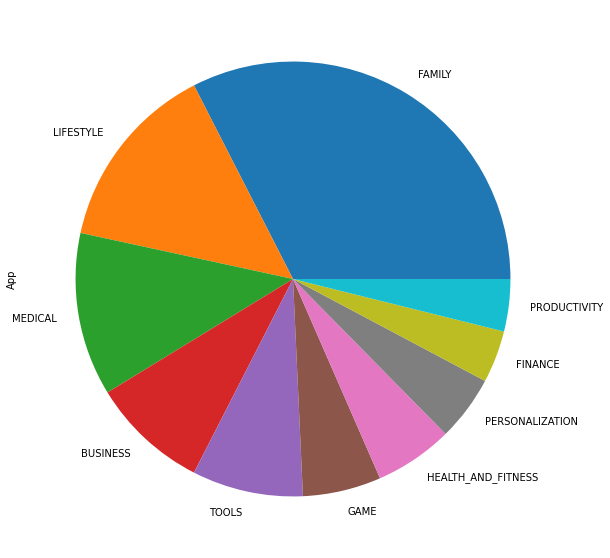

In [5]:
plot = cat_app_rated_5.nlargest(10).plot.pie(figsize=(13, 10))

### Top 10 apps within each category

By sorting in descending order, we get the top count. Likewise, by sorting in ascending order, we get the bottom count.  
By using `head(n)`, we can get the first n records that is sorted. 

In [6]:
df_playstore.sort_values(
    ["Category", "Rating", "Reviews"], ascending=False, inplace=True
)
top10_by_cat = df_playstore.groupby("Category").head(10)
top10_by_cat.head(20)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Weather forecast,WEATHER,4.8,159455,10000000.0,1000000,Free,0.00,Everyone,Weather,"May 8, 2018",1.11.93,4.4 and up
1,Weather Live Pro,WEATHER,4.8,17493,11000000.0,100000,Paid,4.49,Everyone,Weather,"April 20, 2018",1.3,4.4 and up
2,Live Weather Pro,WEATHER,4.8,892,17000000.0,10000,Free,0.00,Everyone,Weather,"July 17, 2018",1.1,4.4 and up
3,Fu*** Weather (Funny Weather),WEATHER,4.7,20001,NaN,1000000,Free,0.00,Mature 17,Weather,"July 26, 2018",Varies with device,Varies with device
4,Weather Forecast Pro,WEATHER,4.7,14051,8700000.0,100000,Paid,3.99,Everyone,Weather,"August 4, 2018",8.5,4.0 and up
5,weather - weather forecast,WEATHER,4.7,11118,9700000.0,1000000,Free,0.00,Everyone,Weather,"April 26, 2018",30,4.0 and up
6,Storm Radar: Tornado Tracker & Hurricane Alerts,WEATHER,4.6,89868,NaN,1000000,Free,0.00,Everyone,Weather,"June 12, 2018",Varies with device,Varies with device
7,Klara weather,WEATHER,4.6,36900,4800000.0,500000,Free,0.00,Everyone,Weather,"July 28, 2018",1.3.6,4.0 and up
8,WebCams,WEATHER,4.6,3963,23000000.0,100000,Free,0.00,Everyone,Weather,"July 17, 2018",5.2.11,4.2 and up
9,"GO Weather - Widget, Theme, Wallpaper, Efficient",WEATHER,4.5,1422858,NaN,50000000,Free,0.00,Everyone,Weather,"August 3, 2018",Varies with device,Varies with device


We shall render the pie charts for a few selected categories for demonstration purpose.

In [7]:
data = top10_by_cat.loc[
    top10_by_cat["Category"].isin(
        ["BUSINESS", "FAMILY", "LIFESTYLE", "MEDICAL", "TOOLS", "GAME"]
    )
][["Category", "App", "Reviews"]].copy()
data.head()

,Category,App,Reviews
462,TOOLS,CL REPL,47
463,TOOLS,CL Notifier,36
464,TOOLS,CL Keyboard - Myanmar Keyboard (No Ads),24
465,TOOLS,Dr. ES PV Calculator,19
466,TOOLS,DW Timer,9


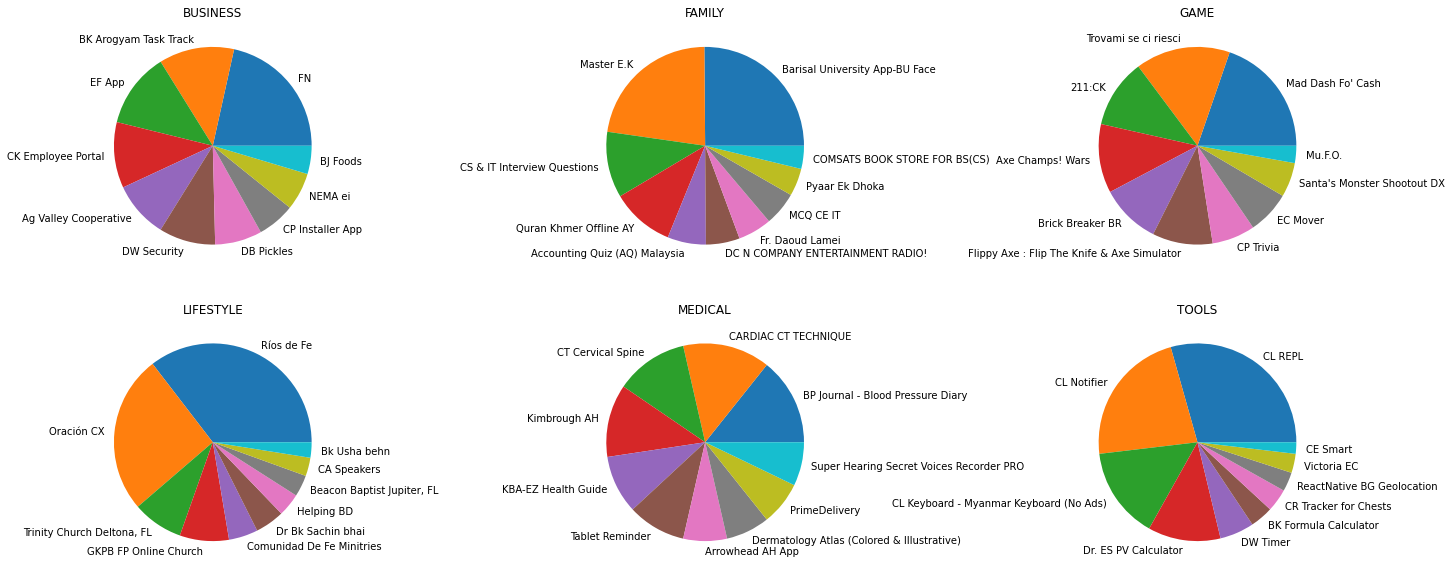

In [8]:
import matplotlib.pyplot as plt

cols = 3
gCat = data.groupby("Category")
rows = int(np.ceil(len(gCat) / cols))
fig, axes = plt.subplots(ncols=cols, nrows=rows, figsize=(25, 10))

for (cat, grp), ax in zip(gCat, axes.flat):
    ax.pie(grp.Reviews, labels=grp.App)
    ax.set_title(cat)

if len(gCat) < cols * rows:
    for ax in axes.flatten()[len(gCat) :]:
        ax.axis("off")

plt.show()

## Top count with atoti

In [9]:
import atoti as tt
from atoti.config import create_config

config = create_config(metadata_db="./metadata.db")
session = tt.create_session(config=config)

Welcome to atoti 0.4.3!

By using this community edition, you agree with the license available at https://www.atoti.io/eula.
Browse the official documentation at https://docs.atoti.io.
Join the community at https://www.atoti.io/register.

You can hide this message by setting the ATOTI_HIDE_EULA_MESSAGE environment variable to True.


In [10]:
playstore = session.read_csv(
    "s3://data.atoti.io/notebooks/topcount/googleplaystore_cleaned.csv",
    store_name="playstore",
    keys=["App", "Category", "Genres", "Current Ver"],
    sampling_mode=tt.sampling.FULL,
    types={"Reviews": tt.types.FLOAT, "Installs": tt.types.FLOAT},
)

playstore.head()

,,,,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Android Ver
App,Category,Genres,Current Ver,,,,,,,,,
Weather forecast,WEATHER,Weather,1.11.93,4.8,159455.0,10000000.0,1000000.0,Free,0.00,Everyone,"May 8, 2018",4.4 and up
Weather Live Pro,WEATHER,Weather,1.3,4.8,17493.0,11000000.0,100000.0,Paid,4.49,Everyone,"April 20, 2018",4.4 and up
Live Weather Pro,WEATHER,Weather,1.1,4.8,892.0,17000000.0,10000.0,Free,0.00,Everyone,"July 17, 2018",4.4 and up
Fu*** Weather (Funny Weather),WEATHER,Weather,Varies with device,4.7,20001.0,NaN,1000000.0,Free,0.00,Mature 17,"July 26, 2018",Varies with device
Weather Forecast Pro,WEATHER,Weather,8.5,4.7,14051.0,8700000.0,100000.0,Paid,3.99,Everyone,"August 4, 2018",4.0 and up


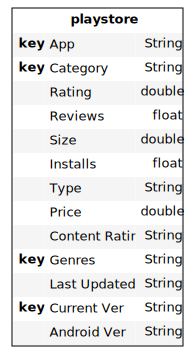

In [11]:
cube = session.create_cube(playstore, "Google Playstore")
cube.schema

### Top 10 apps with highest rating across categories

Use the content editor to apply a top count filter on the pivot table.

In [12]:
cube.visualize("Top 10 apps with highest rating across categories")

Open the notebook in JupyterLab with the atoti extension installed and enabled to see this widget.

### Top 10 categories with the most number of apps rated 5

In [13]:
l = cube.levels
m = cube.measures
m

Measures()

#### Number of apps rated 5

Create a measure that counts the number of apps rated 5 within categories and at levels below the category.

In [14]:
m["Count with rating 5"] = tt.agg.sum(
    tt.where(m["Rating.MEAN"] == 5, m["contributors.COUNT"], 0),
    scope=tt.scope.origin(l["Category"], l["App"]),
)

We can drill down to different levels from category and the count is computed on the fly.

In [15]:
cube.visualize("Categories with apps rated 5")

Open the notebook in JupyterLab with the atoti extension installed and enabled to see this widget.

Apply top count filter from editor on the category by the `Count with rating 5` measure.

In [16]:
cube.visualize("Top 10 categories with most number of apps rated 5")

Open the notebook in JupyterLab with the atoti extension installed and enabled to see this widget.

### Top 10 apps for each category

Go to the atoti's Jupyterlab extension and click on the ellipsis to show MDX and context values.  
![show_mdx.png](https://data.atoti.io/notebooks/topcount/show_mdx.png)  
We will need to use `Generate` instead of `TopCount` to create top 10 apps for each category. Follow this [link](https://activeviam.com/en/resource-center/advanced-mdx-queries) for more advanced mdx tips.

In [ ]:
cube.visualize("Top 10 apps with highest rating for each category")

#### Creating subplot to visualize top count per category

Again, go to the atoti's Jupyterlab extension and click on the ellipsis to show the subplot controls.  
![show subplot controls](https://data.atoti.io/notebooks/topcount/show_subplot_controls.png)  

You should be able to add `Category` level to the subplot section. Remember to modify the MDX to use `Generate` instead.

In [ ]:
cube.visualize("Top 10 apps within each categories")

You can use the filter to select the categories that you want to view.  
Alternative, use `session.url` to access the web application to build an interactive dashboard with quick filters. Check out the link below.

In [ ]:
session.url + "/#/dashboard/767"